# Visualisasi Data Sepak Bola

Sepak Bola merupakan salah satu cabang olahraga yang paling digandrungi di seluruh dunia. Saya sendiri pun sangat suka dengan pertandingan bola, terutama pada taktik dan analisa permainannya. Klub favorit saya adalah **Real Madrid**. 

### Alasan buat project ini
Karena saya suka bola jadi saya memilih project visualisasi statistik pertandingan. Rencana awal saya ingin membuat prediksi juga seperti di google, karena saya belum bisa makanya saya buat visualisasi datanya saja seperti yang sudah diajarkan di **course DQLAB** 

### Install package dan import

Pertama saya menginstall soccerplots, ini saya terinspirasi dari game Winning Eleven dulu yang ada diagram yang mana saya ingin membandingkan data secara visual antara 2 klub di Liga Spanyol.

Setelah saya cari ternyata diagram itu bernama **Diagram Radar**. Maka dari itu saya menginstall package soccerplots di python

In [3]:
!pip install soccerplots

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Karena di google collab ini beberapa package sudah tersedia maka tidak perlu menginstall package tambahan lagi, melainkan hanya import saja. Disini saya juga memasukan csv file nya dari folder content di Google Colab

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from soccerplots.radar_chart import Radar

df = pd.read_csv("/content/Football teams.csv")
df.head(5)

,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,Manchester City,Premier League,83,15.8,46,2,60.8,89.4,12.8,7.01
1,Bayern Munich,Bundesliga,99,17.1,44,3,58.1,85.5,12.9,6.95
2,Paris Saint-Germain,Ligue 1,86,15.0,73,7,60.1,89.5,9.5,6.88
3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86


Kali ini saya akan me-visualisasikan data dari liga spanyol. Di liga ini ada beberapa tim besar seperti Real Madrid, Barcelona, Atletico Madrid, Sevilla, dan Valencis.

In [5]:
LAL = df[df.Tournament=='LaLiga']
LAL.reset_index(inplace=True)
LAL.head()

,index,Team,Tournament,Goals,Shots pg,yellow_cards,red_cards,Possession%,Pass%,AerialsWon,Rating
0,3,Barcelona,LaLiga,85,15.3,68,2,62.4,89.7,10.6,6.87
1,4,Real Madrid,LaLiga,67,14.4,57,2,57.7,87.7,11.8,6.86
2,9,Atletico Madrid,LaLiga,67,12.1,100,0,51.8,83.1,14.4,6.84
3,29,Sevilla,LaLiga,53,12.1,75,2,58.7,86.2,16.6,6.70
4,37,Villarreal,LaLiga,60,10.7,65,5,54.3,84.4,13.0,6.66


### Ranking club berdasarkan Gol

Di section ini saya menampilkan rank dari masing masing club/tim dari LaLiga dengan **Getafe** tim terendah dan **Barcelona** dengan gol terbanyak

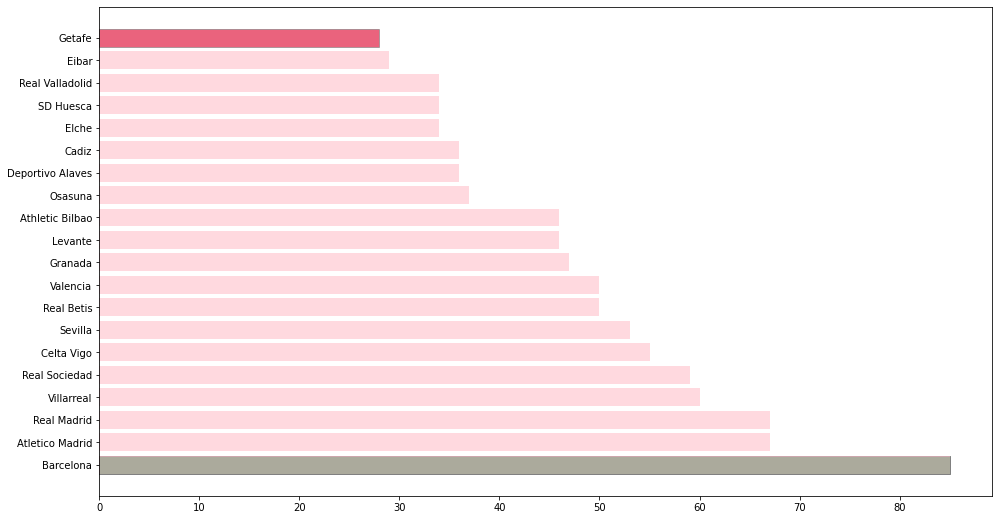

In [53]:
sorted_data = LAL.sort_values(by="Goals",ascending=False)
sorted_data.reset_index(inplace=True)
laliga_goal_top = sorted_data.iloc[0:1]
laliga_goal_bottom = sorted_data.iloc[-1]
mean_score = LAL['Goals'].mean()
laliga_idx = list(sorted_data.index + 1)

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

bars1 = ax.barh(laliga_goal_top['Team'], laliga_goal_top['Goals'], color="seagreen", edgecolor="gray")
bars2 = ax.barh(sorted_data['Team'], sorted_data['Goals'], color="pink", alpha=0.6,)
bars3 = ax.barh(laliga_goal_bottom['Team'], laliga_goal_bottom['Goals'], color="crimson", alpha=0.6, edgecolor="gray")

plt.show()

### Tingkat agresifitas tim LaLiga Spanyol

Section ini, berisi tingkat kartu kuning dan merah pada tim Laliga spanyol, dimana Real Madrid memiliki nilai paling rendah dan Getafe memiliki nilai paling bawah.
 
Hal ini jarang terjadi pada Real Madrid, dimana klub ini sepninggal pemain seperti Pepe dan Sergio Ramos yang sering melakukan pelanggaran.

Sementara itu yang soroti juga dari data ini adalah tim **Atletico Madrid**, tim ini termasuk dalam 5 tim dengan agresifitas yang tinggi dimana memang Atletico memiliki gaya permainan **Konservatif** dimana hanya akan menyerang jika ada ruang saja artinya tim ini lebih bertahan. **Hal itu ** yang menyebabkan pemain dari atletico banyak melakukan pelanggaran

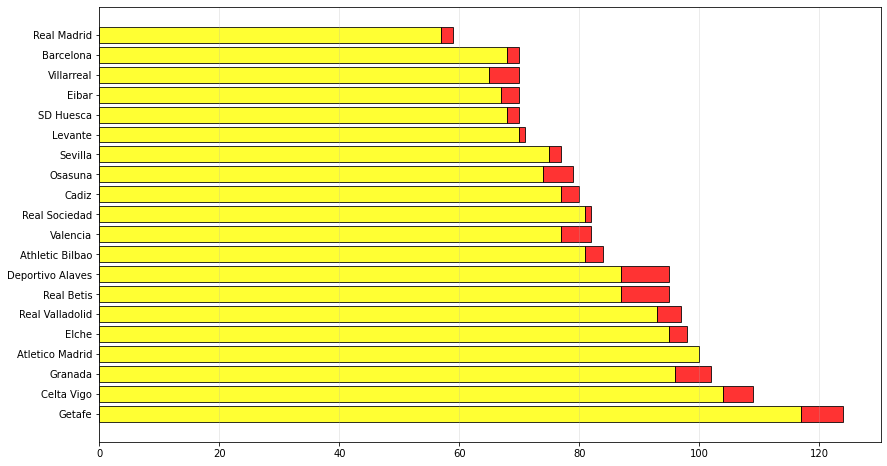

In [36]:
LAL["total_card"] = LAL.red_cards + LAL.yellow_cards
sort_card = LAL.sort_values(by="total_card",ascending=False)

teams = list(sort_card.Team)
yel_card = list(sort_card.yellow_cards.values)
red_card = list(sort_card.red_cards.values)
avg_card = LAL["total_card"].sum()/20

bottom_red = yel_card

fig,ax = plt.subplots(figsize=(14,8))
yellow = ax.barh(teams,yel_card,color="yellow",alpha=0.8,edgecolor="black",label="Yellow Card")
red = ax.barh(teams,red_card,color="red",alpha=0.8,edgecolor="black",left=yel_card,label="Red Card")

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.grid(axis='x', alpha=0.3)

plt.show()

### Tim paling mendominasi pertandingan

Tim yang paling mendominasi pertandingan nomor 1 dipegang Barcelona disusul Sevilla dan Real Madrid, sedangkan paling bawah di tempati club Cadiz

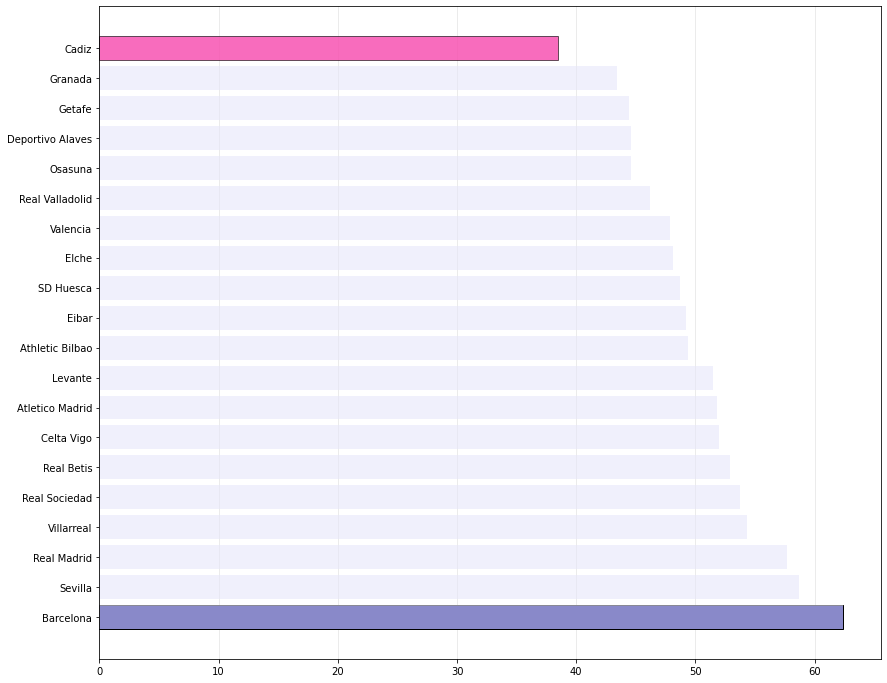

In [58]:
sorted_data = LAL.sort_values(by="Possession%",ascending=False)
sorted_data.reset_index(inplace=True)
lal_goal_top = sorted_data.iloc[0:1]
lal_goal_bot = sorted_data.iloc[-1]
mean_score = LAL['Possession%'].mean()
lal_idx = list(sorted_data.index + 1)


fig, ax = plt.subplots(figsize=(14,12))

bars0 = ax.barh(lal_goal_top['Team'], lal_goal_top['Possession%'], color="navy", edgecolor="black")
bars1 = ax.barh(sorted_data['Team'], sorted_data['Possession%'], color="lavender", alpha=0.6)
bars2 = ax.barh(lal_goal_bot['Team'], lal_goal_bot['Possession%'], color="deeppink", alpha=0.6, edgecolor="black")

ax.grid(axis='x', alpha=0.3)
ax.set_axisbelow(True)
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.show()

### Tim paling kompak

Tim yang kompak adalah tim yang paling baik dalam melakukan sirkulasi bola (Coach Justin). Tingginya passing bisa dijadikan parameter kekompakan tim, semakin tinggi jumlah passing nya maka semakin tinggi pula tingkat akurasi passing nya. Jika akurasi passing saja tinggi itu sudah bisa menandakan kekompakan tim dengan kata lain tim kompak jarang terjadi salah passing / passing gagal.

Pada data ini, passing tertinggi adalah Barcelona, disusul Real Madrid dan Sevilla. Tipical tim juga **mempengaruhi** data ini, seperti Barcelona yang memang gaya menyerangnya mengumpan bola, berbeda dengan Real Madrid gaya menyerangnya **Counter Attack** yang mana passing bukan menjadi hal utama.

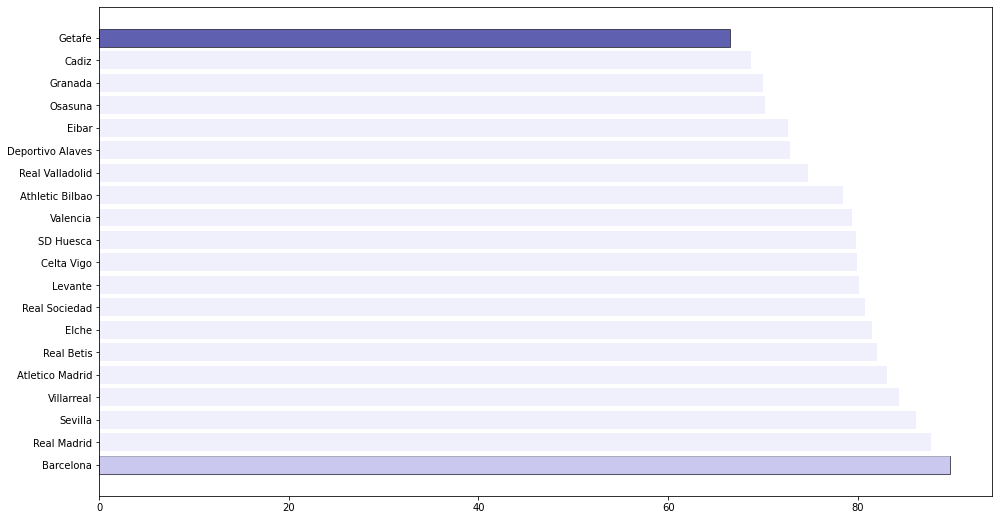

In [63]:
sorted_data = LAL.sort_values(by="Pass%",ascending=False)
sorted_data.reset_index(inplace=True)
laliga_goal_top = sorted_data.iloc[0:1]
laliga_goal_bottom = sorted_data.iloc[-1]
mean_score = LAL['Pass%'].mean()
laliga_idx = list(sorted_data.index + 1)

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

bars1 = ax.barh(laliga_goal_top['Team'], laliga_goal_top['Pass%'], color="slateblue", alpha=0.6, edgecolor="black")
bars2 = ax.barh(sorted_data['Team'], sorted_data['Pass%'], color="lavender", alpha=0.6)
bars3 = ax.barh(laliga_goal_bottom['Team'], laliga_goal_bottom['Pass%'], color="navy", alpha=0.6, edgecolor="black")

plt.show()

## Membuat perbandingan antara 2 tim

---

Disini saya akan membuat perbandingan club Real Madrid dan Barcelona selaku 2 tim teratas berdasarkan data ini menggunakan Diagram Radar. Metric yang digunakan adalah posession, gol, passing, tendangan, duel udara, dan rating dari masing masing tim

In [8]:
params = list(df.columns)
params = params[2:]
Teams = df[(df.Team == "Real Madrid") | (df.Team =="Barcelona")].reset_index(drop=True)

In [9]:
ranges = []
values1  = []
values2  = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(0,2):
    if Teams['Team'][x] == 'Real Madrid':
        values1 = Teams.iloc[x].values.tolist()
    if Teams['Team'][x] == 'Barcelona':
        values2 = Teams.iloc[x].values.tolist()
        
values1 = values1[2:]
values2 = values2[2:]


values = [values1,values2]

In [12]:
#title 
title = dict(title_name ='Real Madrid',
    subtitle_name = 'Rating = 7.01',
    title_color = '#497174',
    subtitle_color = '#497174',
    title_name2 = 'Barcelona',
    subtitle_name2 = 'Rating = 6.85',
    title_color2 = '#EB6440',
    subtitle_color2 = '#EB6440',    
    title_fontsize = 18,
    subtitle_fontsize=15
)

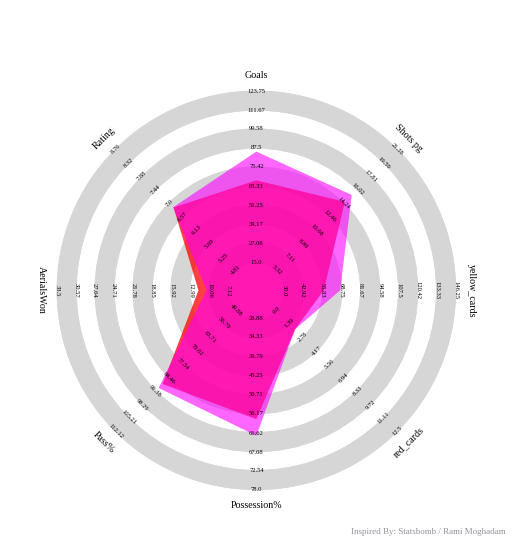

In [68]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['red',"fuchsia"],
                        alphas=[.75,.6],
#                         title=title,
                         compare=True)